# Dog Breed Classifier with transfer learning

In this project I will use keras and a dataset of 6700 labeled dog breed images to create a dog breed classifier. I will be using the VGG16 ImageNet model without the last layer as a base, then I will add a new fully connected layer that will output a vector that holds the predicted dog breed.

I downloaded the dataset of dog images from this repository:https://github.com/udacity/dog-project

In [1]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_y = load_dataset('dogImages/train')
valid_files, valid_y = load_dataset('dogImages/valid')
test_files, test_y = load_dataset('dogImages/test')

Using TensorFlow backend.


In [2]:
# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

#print out all of the breeds that the dataset contains
for name in dog_names:
    print(name+" ")

Affenpinscher 
Afghan_hound 
Airedale_terrier 
Akita 
Alaskan_malamute 
American_eskimo_dog 
American_foxhound 
American_staffordshire_terrier 
American_water_spaniel 
Anatolian_shepherd_dog 
Australian_cattle_dog 
Australian_shepherd 
Australian_terrier 
Basenji 
Basset_hound 
Beagle 
Bearded_collie 
Beauceron 
Bedlington_terrier 
Belgian_malinois 
Belgian_sheepdog 
Belgian_tervuren 
Bernese_mountain_dog 
Bichon_frise 
Black_and_tan_coonhound 
Black_russian_terrier 
Bloodhound 
Bluetick_coonhound 
Border_collie 
Border_terrier 
Borzoi 
Boston_terrier 
Bouvier_des_flandres 
Boxer 
Boykin_spaniel 
Briard 
Brittany 
Brussels_griffon 
Bull_terrier 
Bulldog 
Bullmastiff 
Cairn_terrier 
Canaan_dog 
Cane_corso 
Cardigan_welsh_corgi 
Cavalier_king_charles_spaniel 
Chesapeake_bay_retriever 
Chihuahua 
Chinese_crested 
Chinese_shar-pei 
Chow_chow 
Clumber_spaniel 
Cocker_spaniel 
Collie 
Curly-coated_retriever 
Dachshund 
Dalmatian 
Dandie_dinmont_terrier 
Doberman_pinscher 
Dogue_de_bordeaux 



Here I am running a sanity check to make sure that I have read in the data in the correct order. seems to be ok.

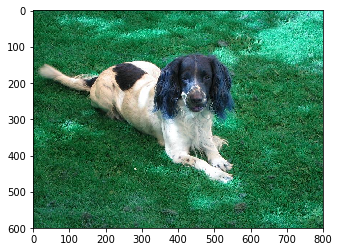

English_springer_spaniel


In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(train_files[5])

plt.imshow(img)
plt.show()
print(dog_names[np.argmax(train_y[5])])

In [8]:
from keras.preprocessing import image                  
from tqdm import tqdm

#this will make sure we dont get errors reshaping the images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#this function will get the image that the path points to and turn it into a tensor, which the model can proccess
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)



In [9]:
from keras.applications.vgg16 import preprocess_input, decode_predictions


This is where I load in the VGG16 model, take off the top layer, set the remaining layers to be untrainable, and finaly add my own dense layer (the new output layer) that I will be training with the dataset.

In [10]:
import keras
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16()


model.layers.pop()
for layer in model.layers:
    layer.trainable=False
last = model.layers[-1].output
x = Dense(len(dog_names), activation="softmax")(last)
finetuned_model = Model(model.input, x)
finetuned_model.compile(optimizer=Adam(lr=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
train_x = []


#propagate the train_x list with tensors
for path in train_files:
    train_x.append(preprocess_input(path_to_tensor(path)))
    
#create a np array with the list of tensors and reshape it so it is compatable with the model
train_x=np.array(train_x)
bb=np.reshape(train_x,(6680,224,224,3))

print(bb.shape)


(6680, 224, 224, 3)


# training the model

I trained the model with 5 epochs and a lr of 0.0005. It looks like our model learned how to recognize dog breeds in the dataset pretty well, finishing with a accuracy of 98% on the test data.

In [18]:
finetuned_model.fit(x=bb,y=train_y,epochs=5);

Epoch 1/5
6680/6680 [==============================] - ETA: 53s - loss: 0.0992 - acc: 0.96 - ETA: 48s - loss: 0.0732 - acc: 0.98 - ETA: 46s - loss: 0.0830 - acc: 0.96 - ETA: 44s - loss: 0.0697 - acc: 0.97 - ETA: 44s - loss: 0.0858 - acc: 0.96 - ETA: 43s - loss: 0.0739 - acc: 0.97 - ETA: 43s - loss: 0.0711 - acc: 0.97 - ETA: 42s - loss: 0.0709 - acc: 0.97 - ETA: 42s - loss: 0.0760 - acc: 0.97 - ETA: 42s - loss: 0.0729 - acc: 0.97 - ETA: 41s - loss: 0.0805 - acc: 0.97 - ETA: 41s - loss: 0.0899 - acc: 0.96 - ETA: 41s - loss: 0.1066 - acc: 0.96 - ETA: 40s - loss: 0.1002 - acc: 0.96 - ETA: 40s - loss: 0.0951 - acc: 0.96 - ETA: 40s - loss: 0.0914 - acc: 0.97 - ETA: 40s - loss: 0.0890 - acc: 0.97 - ETA: 40s - loss: 0.0910 - acc: 0.96 - ETA: 39s - loss: 0.0882 - acc: 0.96 - ETA: 39s - loss: 0.0840 - acc: 0.97 - ETA: 39s - loss: 0.0910 - acc: 0.96 - ETA: 39s - loss: 0.0985 - acc: 0.96 - ETA: 38s - loss: 0.0969 - acc: 0.96 - ETA: 38s - loss: 0.0934 - acc: 0.96 - ETA: 38s - loss: 0.0906 - acc: 0.

6680/6680 [==============================] - ETA: 42s - loss: 0.0041 - acc: 1.00 - ETA: 42s - loss: 0.0199 - acc: 1.00 - ETA: 42s - loss: 0.0144 - acc: 1.00 - ETA: 42s - loss: 0.0713 - acc: 0.99 - ETA: 42s - loss: 0.0580 - acc: 0.99 - ETA: 41s - loss: 0.0489 - acc: 0.99 - ETA: 41s - loss: 0.0446 - acc: 0.99 - ETA: 41s - loss: 0.0431 - acc: 0.99 - ETA: 41s - loss: 0.0397 - acc: 0.99 - ETA: 41s - loss: 0.0390 - acc: 0.99 - ETA: 40s - loss: 0.0397 - acc: 0.99 - ETA: 40s - loss: 0.0397 - acc: 0.99 - ETA: 40s - loss: 0.0437 - acc: 0.99 - ETA: 40s - loss: 0.0444 - acc: 0.98 - ETA: 40s - loss: 0.0418 - acc: 0.98 - ETA: 39s - loss: 0.0417 - acc: 0.98 - ETA: 39s - loss: 0.0463 - acc: 0.98 - ETA: 39s - loss: 0.0573 - acc: 0.98 - ETA: 39s - loss: 0.0549 - acc: 0.98 - ETA: 39s - loss: 0.0612 - acc: 0.98 - ETA: 38s - loss: 0.0593 - acc: 0.98 - ETA: 38s - loss: 0.0566 - acc: 0.98 - ETA: 38s - loss: 0.0567 - acc: 0.98 - ETA: 38s - loss: 0.0551 - acc: 0.98 - ETA: 38s - loss: 0.0533 - acc: 0.98 - ETA: 

6680/6680 [==============================] - ETA: 43s - loss: 0.0019 - acc: 1.00 - ETA: 43s - loss: 0.0038 - acc: 1.00 - ETA: 43s - loss: 0.0048 - acc: 1.00 - ETA: 42s - loss: 0.0051 - acc: 1.00 - ETA: 43s - loss: 0.0054 - acc: 1.00 - ETA: 42s - loss: 0.0049 - acc: 1.00 - ETA: 42s - loss: 0.0087 - acc: 0.99 - ETA: 42s - loss: 0.0084 - acc: 0.99 - ETA: 42s - loss: 0.0080 - acc: 0.99 - ETA: 42s - loss: 0.0075 - acc: 0.99 - ETA: 42s - loss: 0.0080 - acc: 0.99 - ETA: 41s - loss: 0.0076 - acc: 0.99 - ETA: 41s - loss: 0.0073 - acc: 0.99 - ETA: 41s - loss: 0.0073 - acc: 0.99 - ETA: 41s - loss: 0.0070 - acc: 0.99 - ETA: 41s - loss: 0.0069 - acc: 0.99 - ETA: 41s - loss: 0.0070 - acc: 0.99 - ETA: 40s - loss: 0.0072 - acc: 0.99 - ETA: 40s - loss: 0.0072 - acc: 0.99 - ETA: 40s - loss: 0.0070 - acc: 0.99 - ETA: 40s - loss: 0.0076 - acc: 0.99 - ETA: 39s - loss: 0.0083 - acc: 0.99 - ETA: 39s - loss: 0.0081 - acc: 0.99 - ETA: 39s - loss: 0.0093 - acc: 0.99 - ETA: 39s - loss: 0.0092 - acc: 0.99 - ETA: 

6680/6680 [==============================] - ETA: 43s - loss: 0.0097 - acc: 1.00 - ETA: 43s - loss: 0.0061 - acc: 1.00 - ETA: 44s - loss: 0.0044 - acc: 1.00 - ETA: 44s - loss: 0.0047 - acc: 1.00 - ETA: 44s - loss: 0.0040 - acc: 1.00 - ETA: 43s - loss: 0.0040 - acc: 1.00 - ETA: 43s - loss: 0.0044 - acc: 1.00 - ETA: 43s - loss: 0.0041 - acc: 1.00 - ETA: 43s - loss: 0.0199 - acc: 0.99 - ETA: 42s - loss: 0.0207 - acc: 0.99 - ETA: 42s - loss: 0.0238 - acc: 0.99 - ETA: 42s - loss: 0.0221 - acc: 0.99 - ETA: 42s - loss: 0.0206 - acc: 0.99 - ETA: 41s - loss: 0.0203 - acc: 0.99 - ETA: 41s - loss: 0.0192 - acc: 0.99 - ETA: 41s - loss: 0.0190 - acc: 0.99 - ETA: 41s - loss: 0.0187 - acc: 0.99 - ETA: 40s - loss: 0.0177 - acc: 0.99 - ETA: 40s - loss: 0.0168 - acc: 0.99 - ETA: 40s - loss: 0.0162 - acc: 0.99 - ETA: 40s - loss: 0.0155 - acc: 0.99 - ETA: 40s - loss: 0.0149 - acc: 0.99 - ETA: 39s - loss: 0.0143 - acc: 0.99 - ETA: 39s - loss: 0.0141 - acc: 0.99 - ETA: 39s - loss: 0.0137 - acc: 0.99 - ETA: 

6680/6680 [==============================] - ETA: 45s - loss: 0.0023 - acc: 1.00 - ETA: 45s - loss: 0.0013 - acc: 1.00 - ETA: 46s - loss: 0.0013 - acc: 1.00 - ETA: 45s - loss: 0.0012 - acc: 1.00 - ETA: 45s - loss: 0.0213 - acc: 0.99 - ETA: 45s - loss: 0.0345 - acc: 0.98 - ETA: 45s - loss: 0.0300 - acc: 0.99 - ETA: 44s - loss: 0.0265 - acc: 0.99 - ETA: 44s - loss: 0.0237 - acc: 0.99 - ETA: 43s - loss: 0.0507 - acc: 0.99 - ETA: 43s - loss: 0.0463 - acc: 0.99 - ETA: 43s - loss: 0.0555 - acc: 0.98 - ETA: 42s - loss: 0.0515 - acc: 0.99 - ETA: 42s - loss: 0.0708 - acc: 0.98 - ETA: 42s - loss: 0.0668 - acc: 0.98 - ETA: 41s - loss: 0.0707 - acc: 0.98 - ETA: 41s - loss: 0.0841 - acc: 0.98 - ETA: 41s - loss: 0.0794 - acc: 0.98 - ETA: 41s - loss: 0.0849 - acc: 0.98 - ETA: 41s - loss: 0.0830 - acc: 0.97 - ETA: 41s - loss: 0.0796 - acc: 0.98 - ETA: 41s - loss: 0.0762 - acc: 0.98 - ETA: 40s - loss: 0.0750 - acc: 0.98 - ETA: 40s - loss: 0.0789 - acc: 0.98 - ETA: 40s - loss: 0.0765 - acc: 0.98 - ETA: 

In [14]:
#this function will make a prediction on the image passed to it and will 
#print out the image and return the prediction as a string
def predict_breed(img_path):
    img = preprocess_input(path_to_tensor(img_path))
    prediction = dog_names[np.argmax(finetuned_model.predict(img))]
    imag = cv2.imread(img_path)

    plt.imshow(imag)
    plt.show()
    return prediction

dog_path_1='dogpic.jpg'
dog_path_2='don.jpg'


# Testing the model on my own dog

I wanted to test out the model on my own dog, emma. She is pug and sadly, pugs are not one of the breeds in the dataset. The model seems to think she a french bull dog, which isn't a bad guess.

I also gave a picture of our fine president, don trump. Apparently he is a Wirehaired pointing griffon, which isn't a bad guess either.


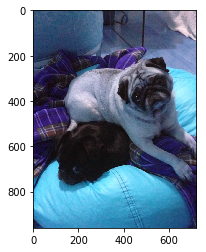

French_bulldog


In [25]:
print(predict_breed(dog_path_1))

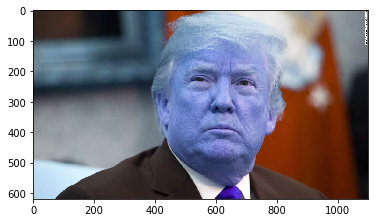

Wirehaired_pointing_griffon


In [26]:
print(predict_breed(dog_path_2))